<a href="https://colab.research.google.com/github/Dharma-Ranganathan/AllAboutPython/blob/main/DL_Projects_Codes/cifar10_classifcation_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CIFAR 10 image classification using ANN**

In [1]:
# import libraries
import tensorflow as tf
from tensorflow import keras
import cv2
from google.colab.patches import cv2_imshow

In [3]:
# data collection
(x_train,y_train), (x_test,y_test) = keras.datasets.cifar10.load_data()

In [4]:
# shapes of dataset
print(x_train.shape, y_train.shape, ' | ',x_test.shape, y_test.shape )

(50000, 32, 32, 3) (50000, 1)  |  (10000, 32, 32, 3) (10000, 1)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
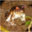

In [5]:
# analysing the x_train dataset
x_train[0]

In [6]:
x_train[0].shape

(32, 32, 3)

In [9]:
# checking the labels
y_train[0]

array([6], dtype=uint8)

In [10]:
# creating custom classes for the labels
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [12]:
labels[y_train[0][0]]

'frog'

In [14]:
y_train[1]

array([9], dtype=uint8)

In [13]:
labels[y_train[1][0]]

'truck'

In [15]:
# output layer length
len(labels)

10

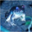

In [23]:
# converting colored images to grayscale
cv2_imshow(x_train[0]) # frog image in colored

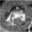

In [24]:
# grayscale
to_gray = cv2.COLOR_RGB2GRAY # retrun gray color code - 7

# colored to gray
gray_0 = cv2.cvtColor(x_train[0],to_gray)
cv2_imshow(gray_0)

In [25]:
gray_0.shape

(32, 32)

In [31]:
x_train_grayed = []
for i in range(len(x_train)):
  gray = cv2.cvtColor(x_train[i],to_gray)
  x_train_grayed.append(gray)

import numpy as np
x_train_grayed_np = np.asarray(x_train_grayed)


In [32]:
x_train_grayed_np.shape

(50000, 32, 32)

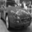

In [33]:
# check image
cv2_imshow(x_train_grayed_np[5])

In [34]:
# scaling the entire x train dataset
x_train_scaled = x_train_grayed_np / 255

In [35]:
x_train_scaled.shape

(50000, 32, 32)

In [36]:
x_train_scaled[2]

array([[1.        , 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99215686],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       ...,
       [0.45882353, 0.45098039, 0.42745098, ..., 0.30588235, 0.30196078,
        0.30196078],
       [0.45098039, 0.42352941, 0.40392157, ..., 0.28627451, 0.29019608,
        0.32156863],
       [0.43137255, 0.40392157, 0.38823529, ..., 0.3254902 , 0.3254902 ,
        0.32941176]])

In [37]:
# input layer
32 * 32

1024

In [38]:
# output layer
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [39]:
# constructing the model from scratch using keras and tensorflow
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32)),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
# compiling our model with optimizer, loss, metrics
model.compile(
    optimizer = 'adam', # gradient descent to adjust weights and bias
    loss = 'sparse_categorical_crossentropy', # log loss or loss function
    metrics = ['accuracy']
)

In [42]:
model.fit(x_train_scaled,y_train,epochs = 100)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.5939 - loss: 1.1369
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6004 - loss: 1.1190
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.5955 - loss: 1.1252
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.6030 - loss: 1.1083
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6030 - loss: 1.1076
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6080 - loss: 1.0970
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6051 - loss: 1.1063
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6052 - loss: 1.0974
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6113 - loss: 1.0857
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6140 - loss: 1.0832
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6196 - loss: 1.07

In [43]:
# prediction on unseen data

x_test_grayed = []
for i in range(len(x_test)):
  gray = cv2.cvtColor(x_test[i],to_gray)
  x_test_grayed.append(gray)

# import numpy as np
x_test_grayed_np = np.asarray(x_test_grayed)


In [44]:
x_test_grayed_np.shape

(10000, 32, 32)

In [45]:
x_test_scaled = x_test_grayed_np / 255

In [46]:
x_test_scaled[0]

array([[0.46666667, 0.4627451 , 0.48235294, ..., 0.39607843, 0.37254902,
        0.34509804],
       [0.45882353, 0.44705882, 0.47058824, ..., 0.39215686, 0.36862745,
        0.35686275],
       [0.45098039, 0.44313725, 0.45882353, ..., 0.40392157, 0.38823529,
        0.36078431],
       ...,
       [0.44313725, 0.34509804, 0.30196078, ..., 0.33333333, 0.21176471,
        0.29803922],
       [0.41176471, 0.35686275, 0.29411765, ..., 0.27843137, 0.27843137,
        0.21960784],
       [0.38039216, 0.37254902, 0.31764706, ..., 0.2627451 , 0.29019608,
        0.22745098]])

In [47]:
y_pred = model.predict(x_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [48]:
y_pred[0]

array([1.5884815e-03, 2.6294929e-08, 5.3116702e-03, 1.2969006e-03,
       2.0621251e-02, 1.6374993e-03, 5.7858255e-02, 5.6013880e-05,
       3.4814253e-03, 5.3355493e-06], dtype=float32)

In [49]:
np.argmax(y_pred[0])

np.int64(6)

In [50]:
y_test[0]

array([3], dtype=uint8)

In [52]:
np.argmax(y_pred[1])

np.int64(8)

In [53]:
y_test[1]

array([8], dtype=uint8)

In [54]:
# building a prediction system
def prediction(true,pred):
  if true == pred:
    print('prediction is right')
  else:
    print('prediction is wrong')

In [55]:
# labels checking
labels[y_test[50][0]]

'truck'

In [56]:
labels[np.argmax(y_pred[50])]

'truck'

In [57]:
prediction(labels[y_test[50][0]],labels[np.argmax(y_pred[50])])

prediction is right


In [59]:
prediction(labels[y_test[200][0]],labels[np.argmax(y_pred[200])])

prediction is wrong


In [61]:
labels[y_test[200][0]]

'dog'

In [62]:
labels[np.argmax(y_pred[200])]

'cat'

**Thank you ...**